In [3]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For Timestamp
from datetime import datetime

# Tech Stock that we will use for analysis
tech_comp = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Setting END and START time for data grab
end = datetime.now()
start = datetime(end.year-1, end.month , end.day)

for stock in tech_comp:
    globals()[stock] = yf.download(stock, start, end) 

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, comp_name in zip(company_list, company_name):
    company['company_name'] = comp_name
    
df = pd.concat(company_list, axis = 0)
df.tail(10)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-24,146.699997,147.199997,145.320007,146.740005,146.740005,22378400,AMAZON
2023-11-27,147.529999,149.259995,146.880005,147.729996,147.729996,53762400,AMAZON
2023-11-28,146.979996,147.600006,145.529999,147.029999,147.029999,42711700,AMAZON
2023-11-29,147.850006,148.539993,145.970001,146.320007,146.320007,40610900,AMAZON
2023-11-30,144.759995,146.929993,144.330002,146.089996,146.089996,65814000,AMAZON
2023-12-01,146.000000,147.250000,145.550003,147.029999,147.029999,39924600,AMAZON
2023-12-04,145.250000,145.350006,142.809998,144.839996,144.839996,48294200,AMAZON
2023-12-05,143.550003,148.570007,143.130005,146.880005,146.880005,46822400,AMAZON
2023-12-06,147.580002,147.850006,144.279999,144.520004,144.520004,39679000,AMAZON


In [4]:
# Summary 
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,168.608845,170.234024,167.259442,168.846893,168.372679,6.104186e+07
std,18.611622,18.430647,18.750179,18.567805,18.728543,1.864567e+07
min,126.010002,127.769997,124.169998,125.019997,124.325081,2.404830e+07
25%,153.629997,155.900002,151.735001,154.175003,153.434830,4.862100e+07
50%,173.130005,174.300003,171.899994,173.660004,173.211807,5.629440e+07
75%,182.490005,184.134995,181.220001,182.650002,182.409683,6.830675e+07
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.601569e+08


In [5]:
# General Info

AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-12-08 to 2023-12-07
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


## CLOSING PRICE ##

The closing price is the final price at which a stock is bought or sold during a regular trading day. Investors commonly use this closing price as a standard reference point to monitor how the stock is doing over a period.

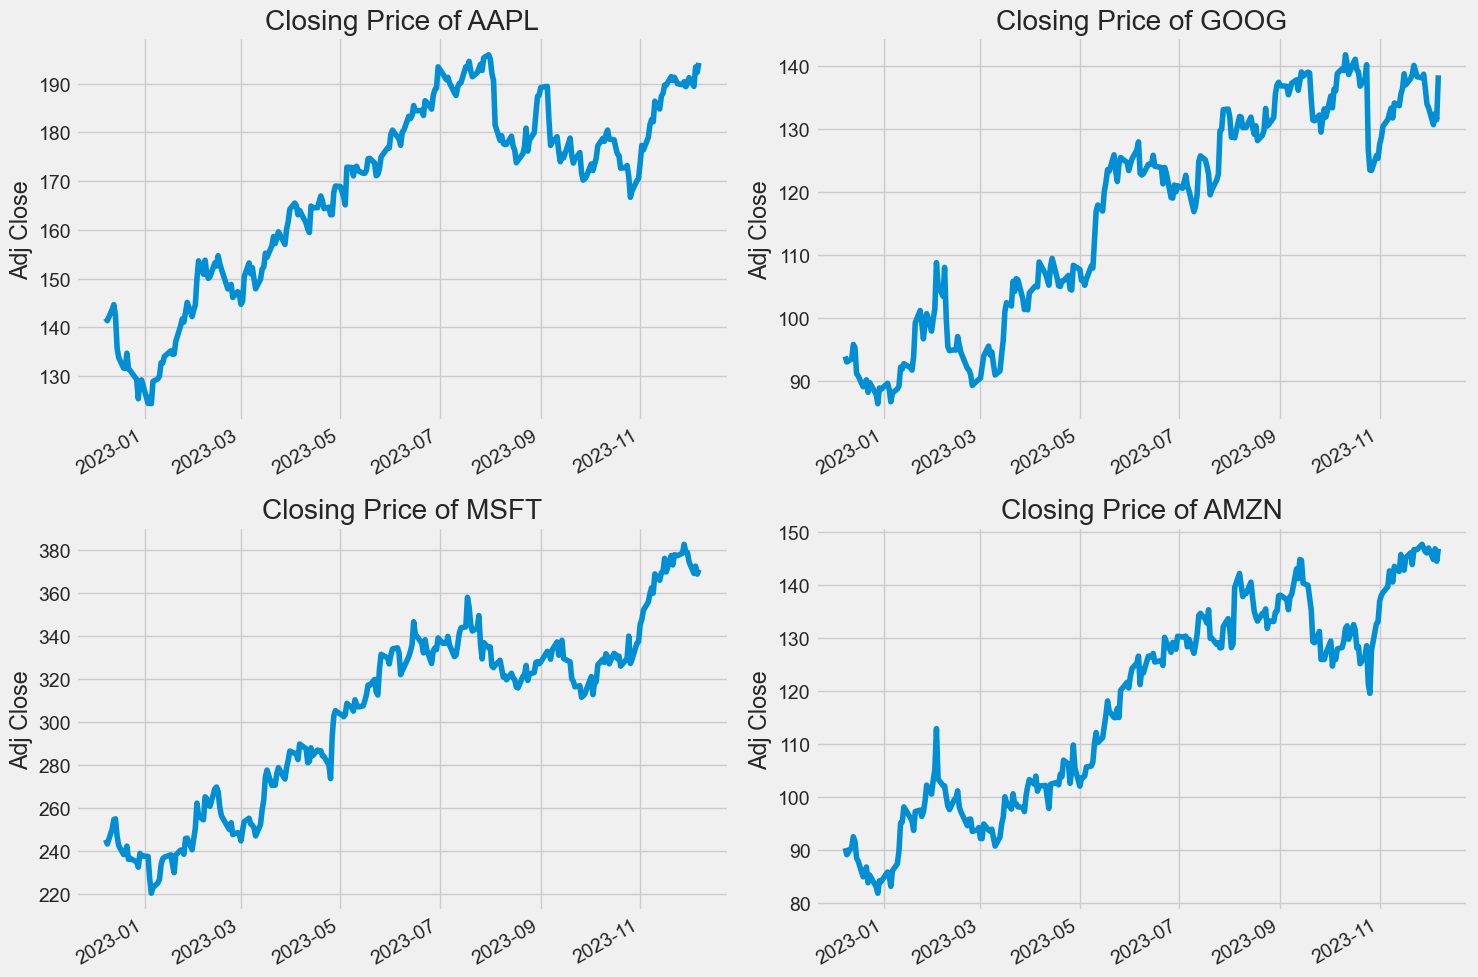

In [6]:
# Historical view of closing price

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom = 1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_comp[i - 1]}")

plt.tight_layout()

## VOLUME OF SALES ##

Volume is the measure of how much of a stock or asset is bought and sold during a specific time, like a day. For example, stock trading volume tells us how many shares of a company's stock were traded from the time the market opened to when it closed. This information is crucial for traders who use technical analysis to make decisions.

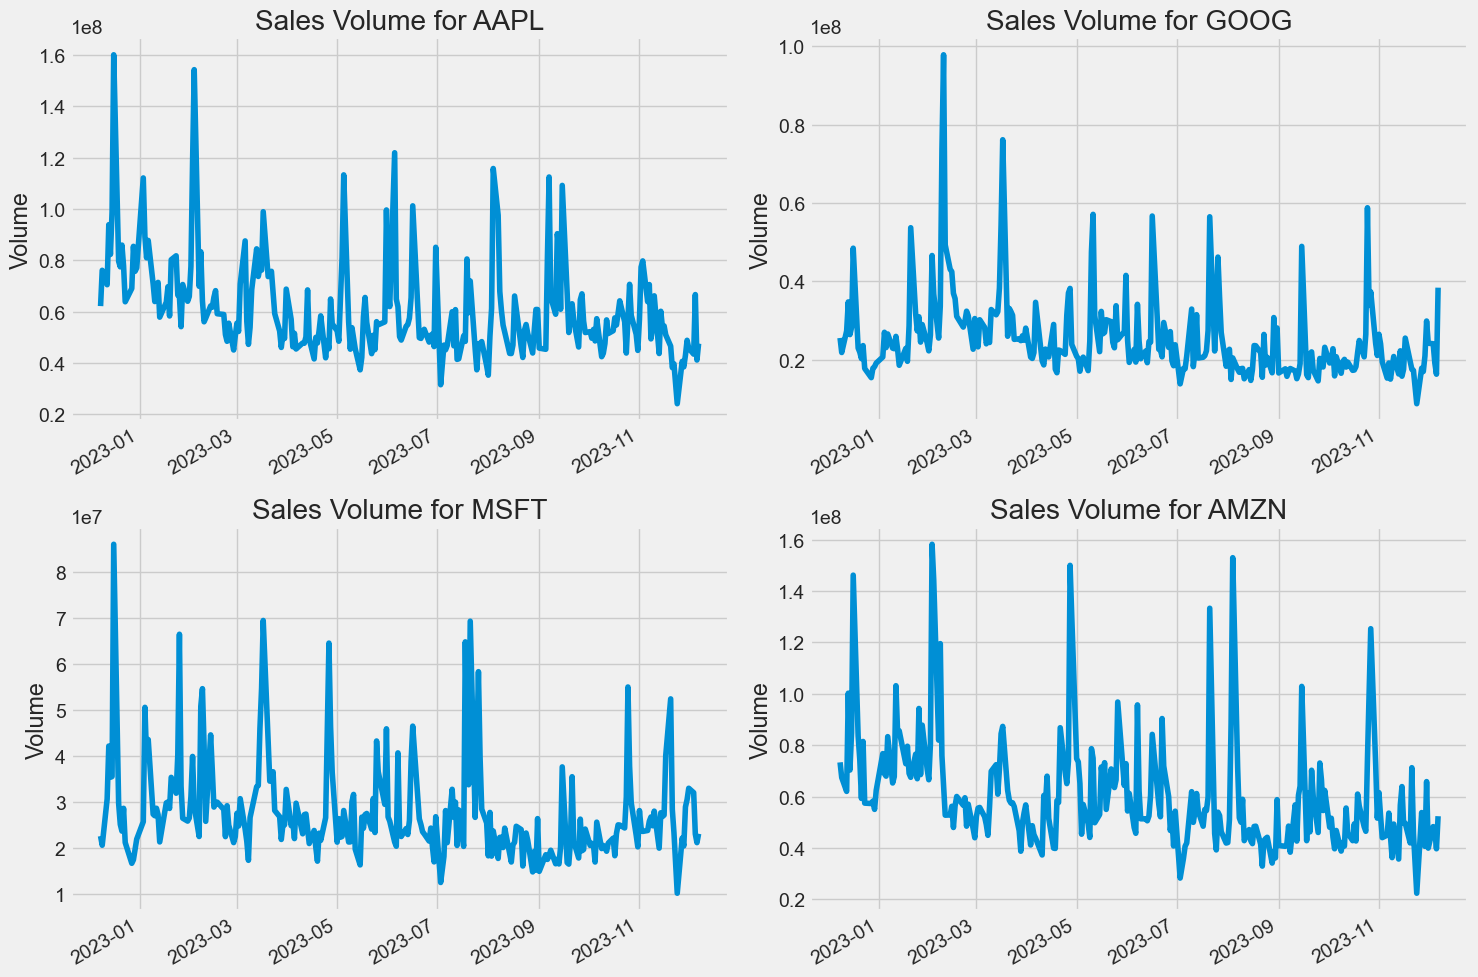

In [7]:
# Now we'll plot the total volume of stocks being traded each day

plt.figure(figsize = (15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_comp[i-1]}")
    
plt.tight_layout()

## MOVING AVERAGE ##

The moving average is a tool used in stock market analysis to make price data smoother. It calculates an average price over a set time, such as 10 days or 20 minutes, to help traders understand trends more easily.

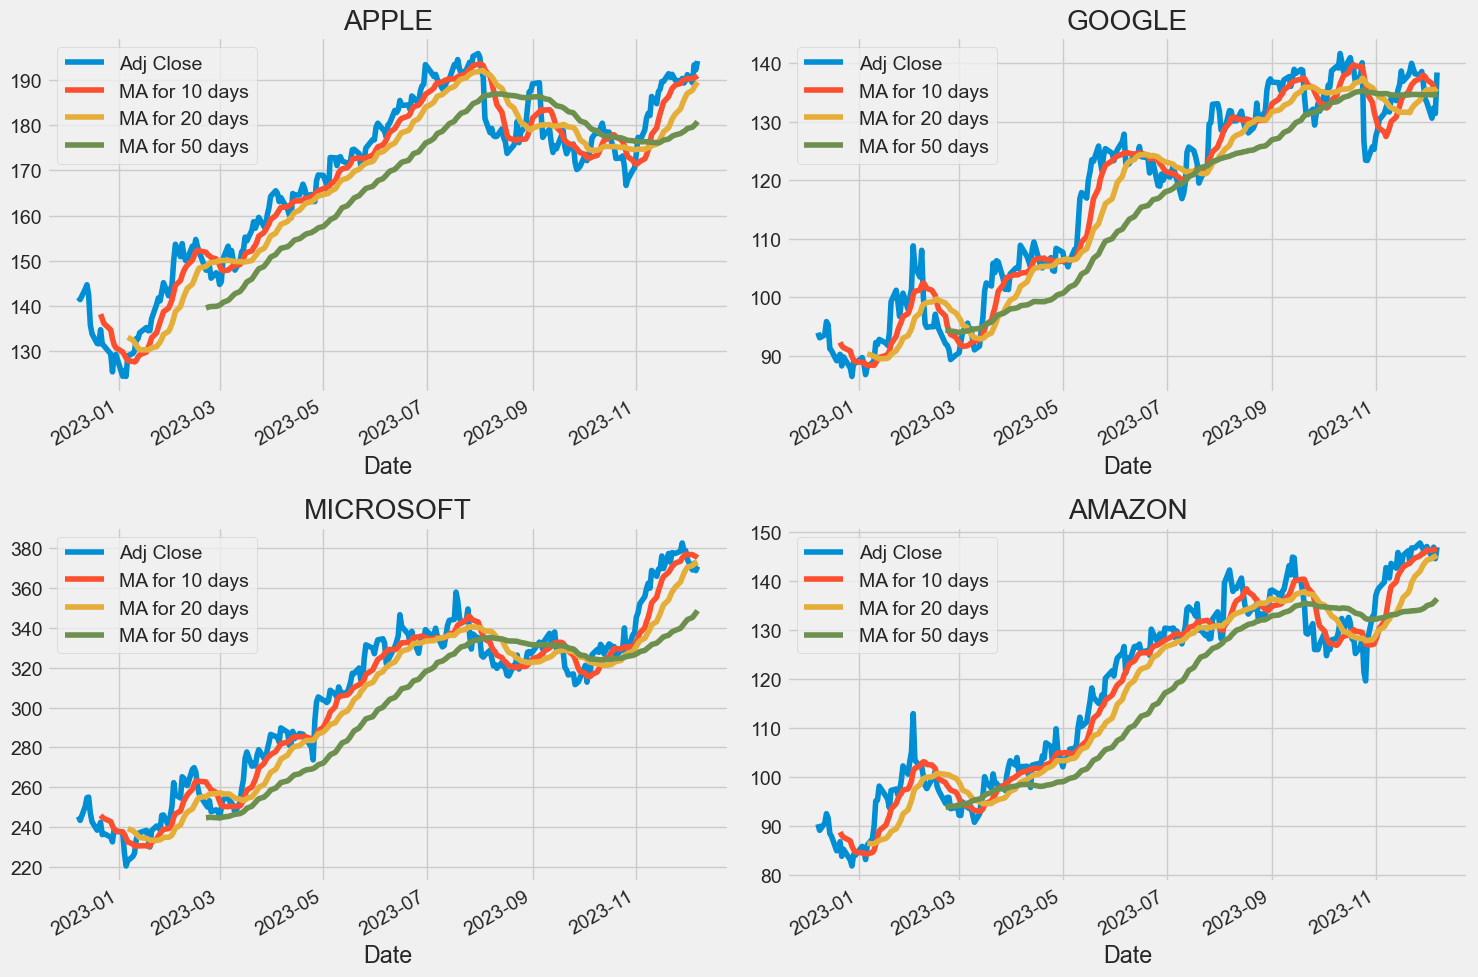

In [8]:
mv_day = [10, 20, 50]

for mv in mv_day:
    for company in company_list:
        column_name = f"MA for {mv} days"
        company[column_name] = company['Adj Close'].rolling(mv).mean()
        
fig,axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


## Daily Return of Stock on Average ##

Now, we'll use pandas to check how much the Apple stock changes on a daily basis rather than just looking at its overall value. This will help us understand the daily returns and analyze the risk associated with the stock.

### pct_change() ### 
It claculates the percentage change between the current and previous elements in data. It is commonly used in finance to measure how values change over time, providing insights into daily or periodic returns.

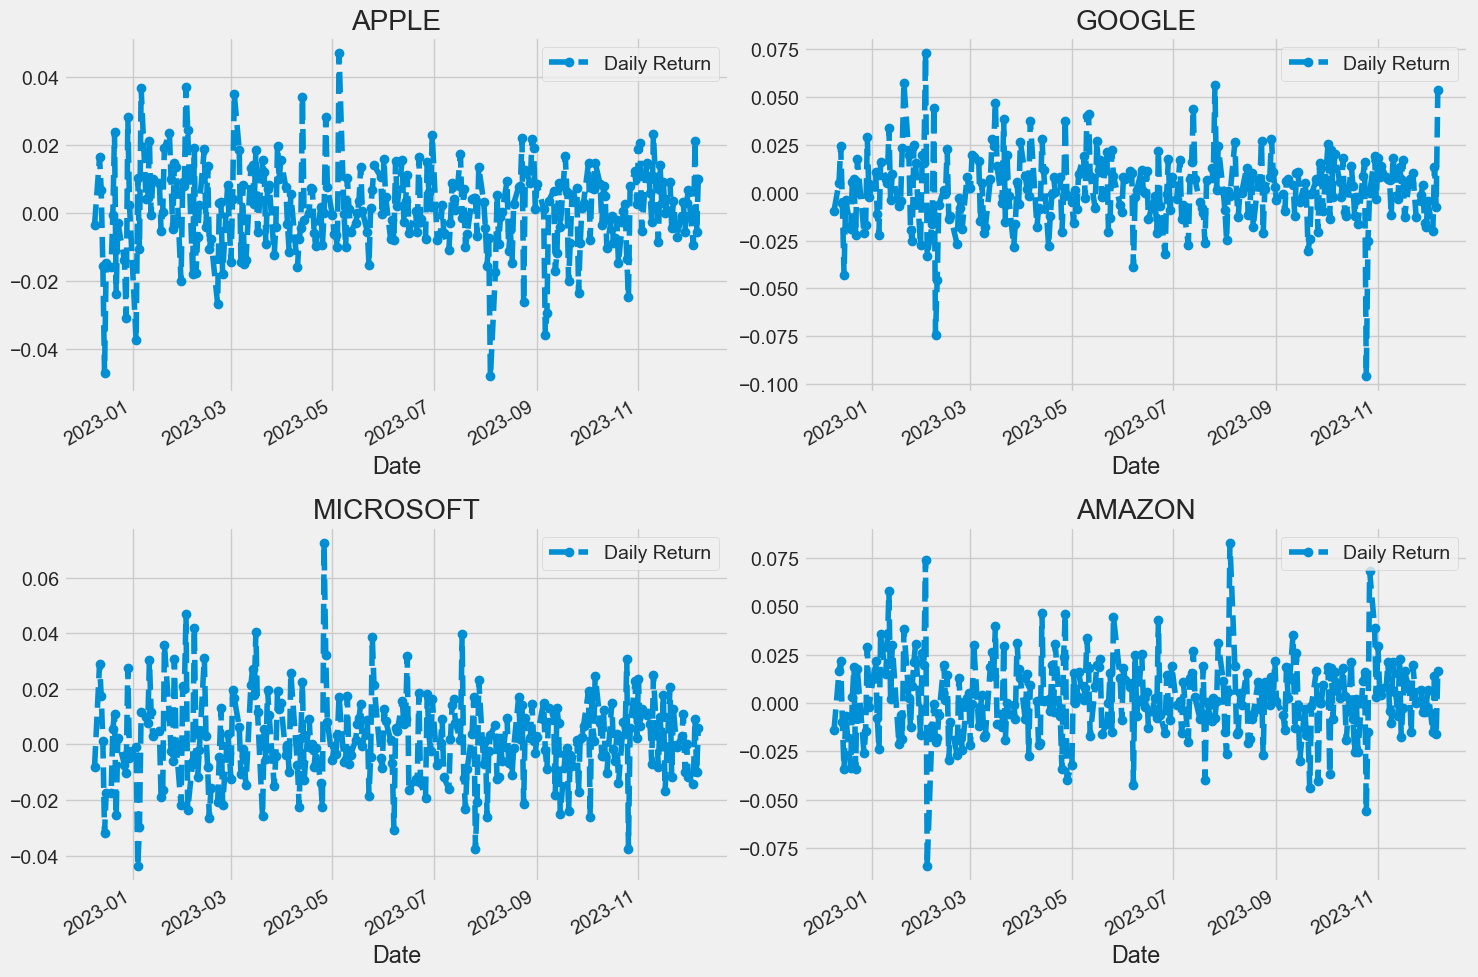

In [9]:
# We'll use pct_change() to find the perecent change for each day

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
# Now we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax = axes[0,0], legend = True, linestyle = '--', marker = 'o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax = axes[0,1], legend = True, linestyle = '--', marker = 'o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax = axes[1,0], legend = True, linestyle = '--', marker = 'o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax = axes [1,1], legend = True, linestyle = '--', marker = 'o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

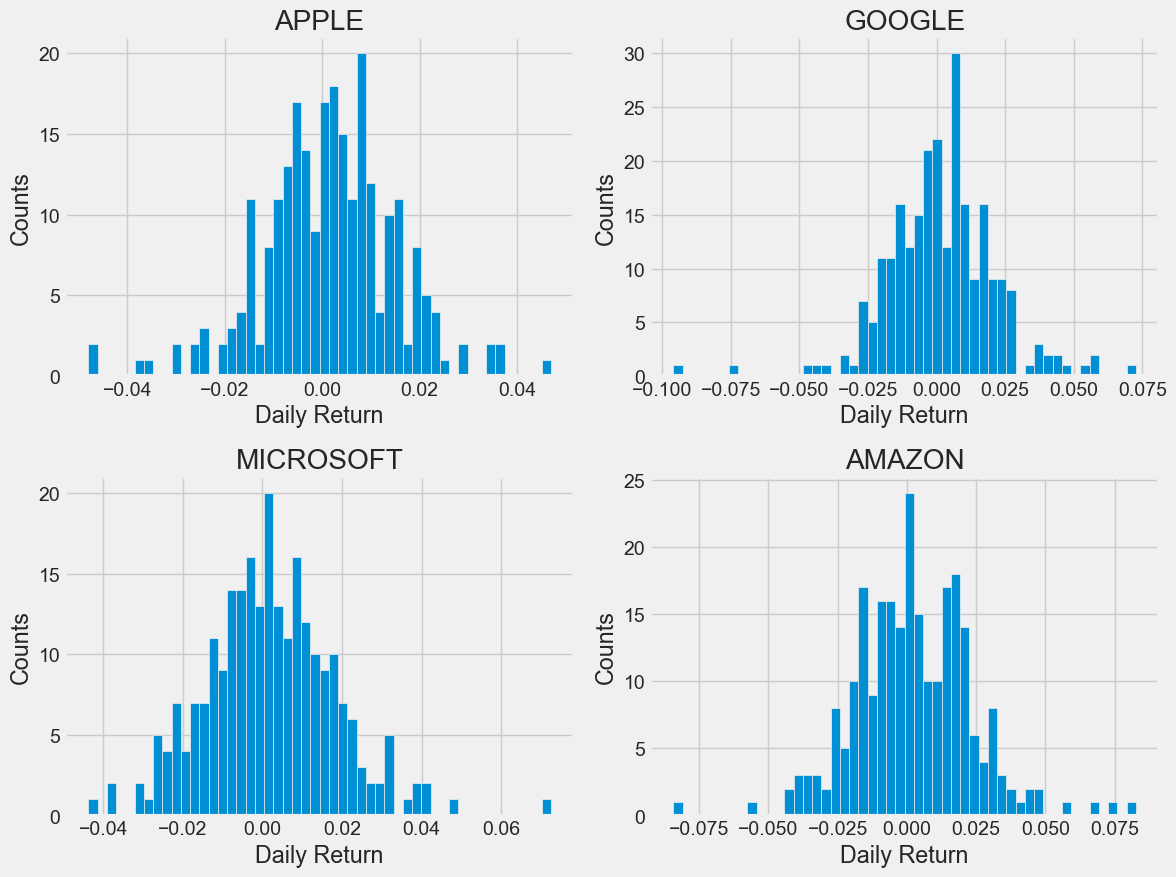

In [10]:
# Average daily return using histogram

plt.figure(figsize=(12,9))
for i, compnay in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    compnay['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

 ## Correlation between different stocks closing prices ##
 
Correlation is a number that tells us how two things are related, and it ranges from **-1.0 to +1.0**. It shows if two variables move together or in opposite directions but doesn't tell us which one causes the other. Now, if we want to look at how the returns of all the stocks on our list are related, we can create a DataFrame that includes the closing prices for each stock.

In [11]:
# We'll grab all the closing prices for the tech stocks in single dataframe

closing_df = pdr.get_data_yahoo(tech_comp, start = start, end = end)['Adj Close']

# Creating new dataframe for new tech returns

tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-12-08,NaN,NaN,NaN,NaN
2022-12-09,-0.003435,-0.013946,-0.009367,-0.008003
2022-12-12,0.016390,0.016388,0.005265,0.028889
2022-12-13,0.006783,0.021425,0.024476,0.017465
2022-12-14,-0.015536,-0.009839,-0.005634,0.001168


We can now assess the correlation between the daily percentage returns of two stocks, allowing us to understand how closely their price changes align with each other. Let's begin by examining a stock in comparison to itself.

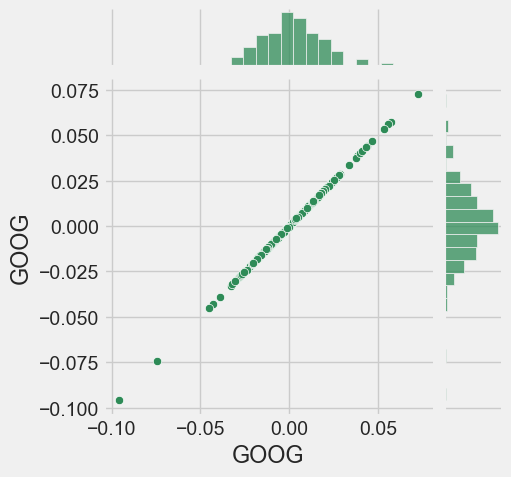

In [12]:
# Comparing GGOLE to itself should show a perfect linear relationship

sns.jointplot(x = 'GOOG', y = 'GOOG', data = tech_rets, kind = 'scatter', color = 'seagreen', height = 5)
plt.show()

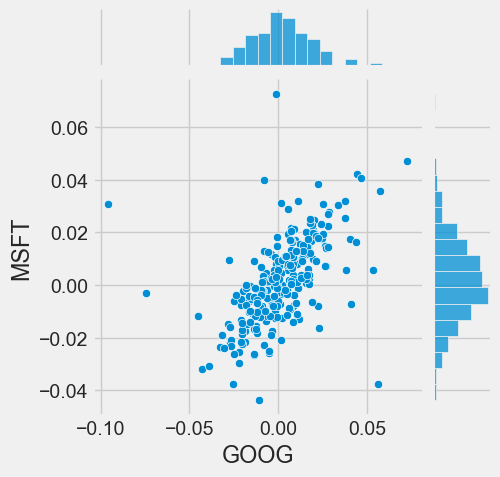

In [13]:
# Now we'll compare daily return of GOOGLE and MICROSOFT

sns.jointplot(x = 'GOOG', y = 'MSFT', data = tech_rets, kind = 'scatter', height = 5)
plt.show()

Now, if two stocks are perfectly correlated in a positive way, we expect to observe a linear relationship in their daily return values. Seaborn and pandas simplify the process of conducting this comparative analysis for every conceivable pair of stocks in our technology stock ticker list. The sns.pairplot() function can be employed to automatically generate this plot.

C:\Users\makno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


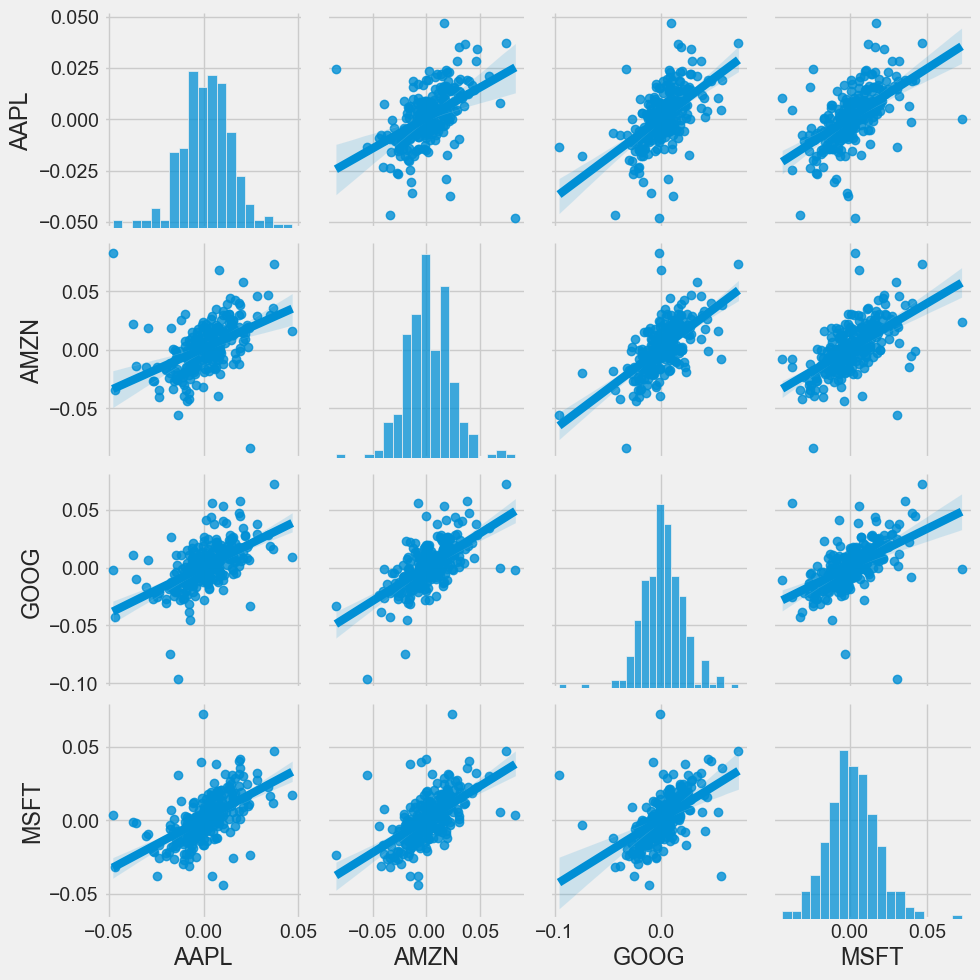

In [14]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis

sns.pairplot(tech_rets, kind='reg')

In the presented overview, the daily return relationships among various stocks are evident. A notable observation is the intriguing correlation between the daily returns of Google and Amazon. To delve deeper into this specific comparison, an alternative approach involves employing the sns.PairGrid() method instead of the convenient sns.pairplot(). This allows for a more customized figure, providing full control over the types of plots displayed in the diagonal, upper triangle, and lower triangle sections. The following example demonstrates harnessing the complete capabilities of seaborn to attain such a result.

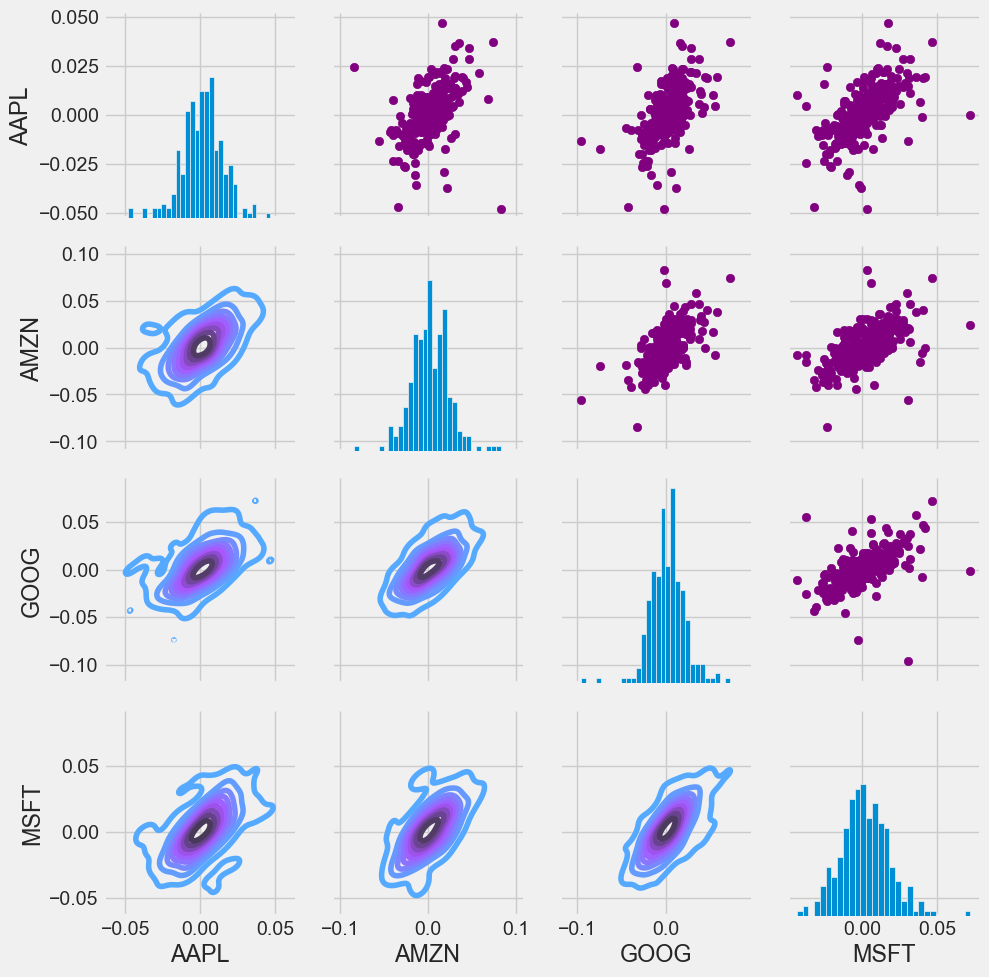

In [18]:
# Set up our figure by naming it returns_fig
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

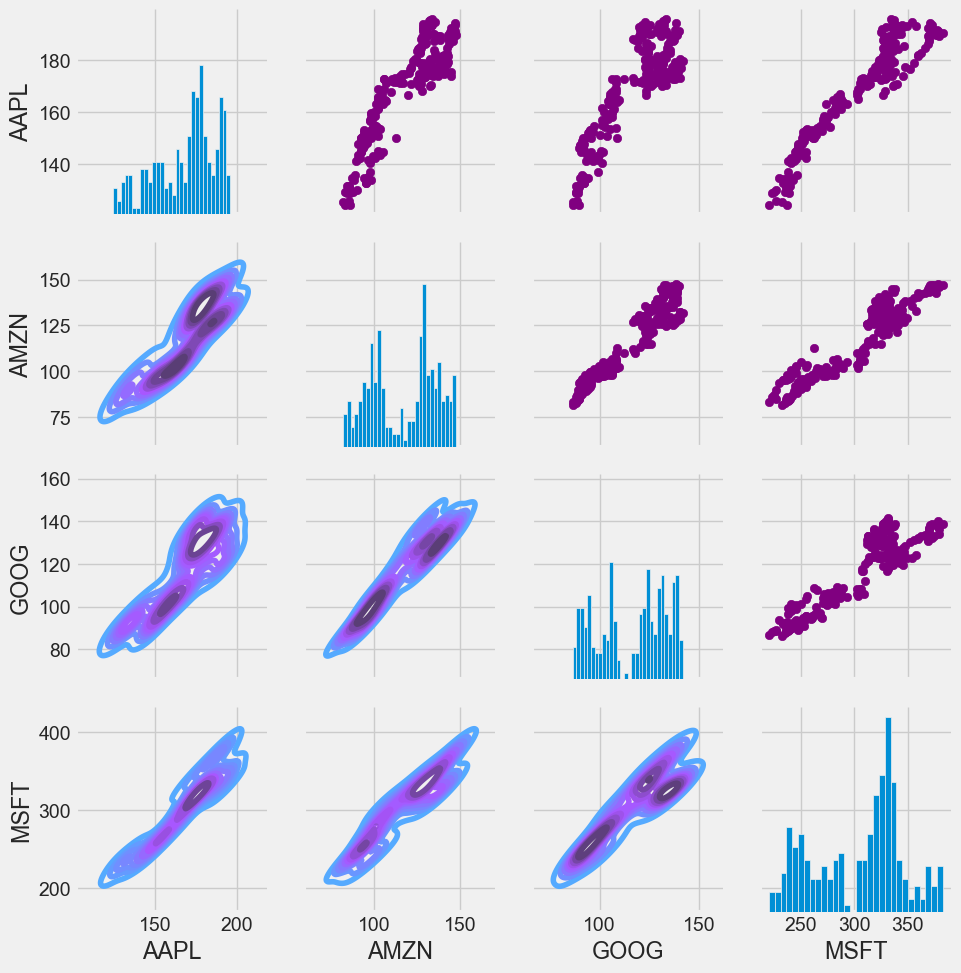

In [19]:
# Set up our figure by naming it returns_fig
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Additionally, we can generate a correlation plot to obtain precise numerical values representing the correlations between the daily return values of the stocks. When scrutinizing the closing prices, an intriguing correlation emerges between Microsoft and Apple, adding another layer of insight to our analysis.

Text(0.5, 1.0, 'Correlation of stock closing price')

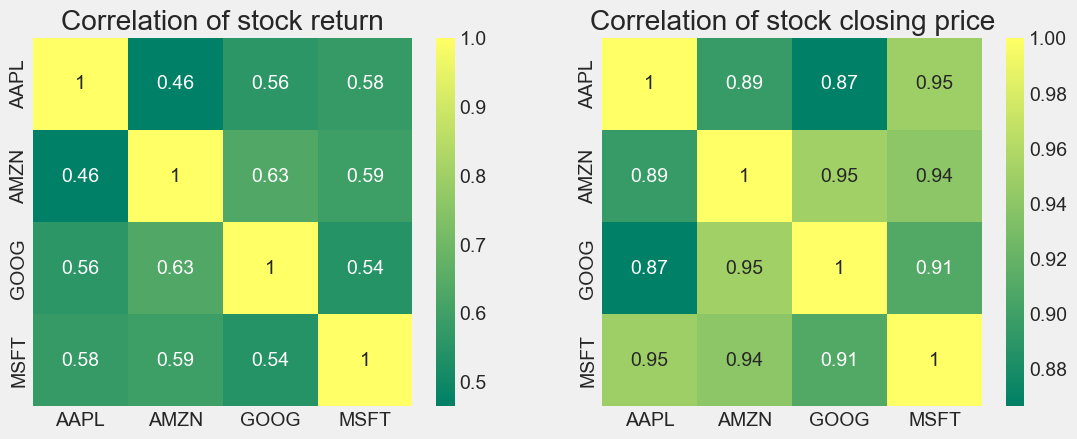

In [20]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

As anticipated from our PairPlot analysis, both numerically and visually, Microsoft and Amazon exhibit the highest correlation in daily stock returns. Notably, there is a noteworthy observation that all the technology companies display a positive correlation, emphasizing a collective trend in the sector.

## What is the potential risk exposure when investing in a specific stock? ##

There are various methods to measure risk, and one fundamental approach based on the collected data of daily percentage returns involves comparing the expected return to the standard deviation of these daily returns.

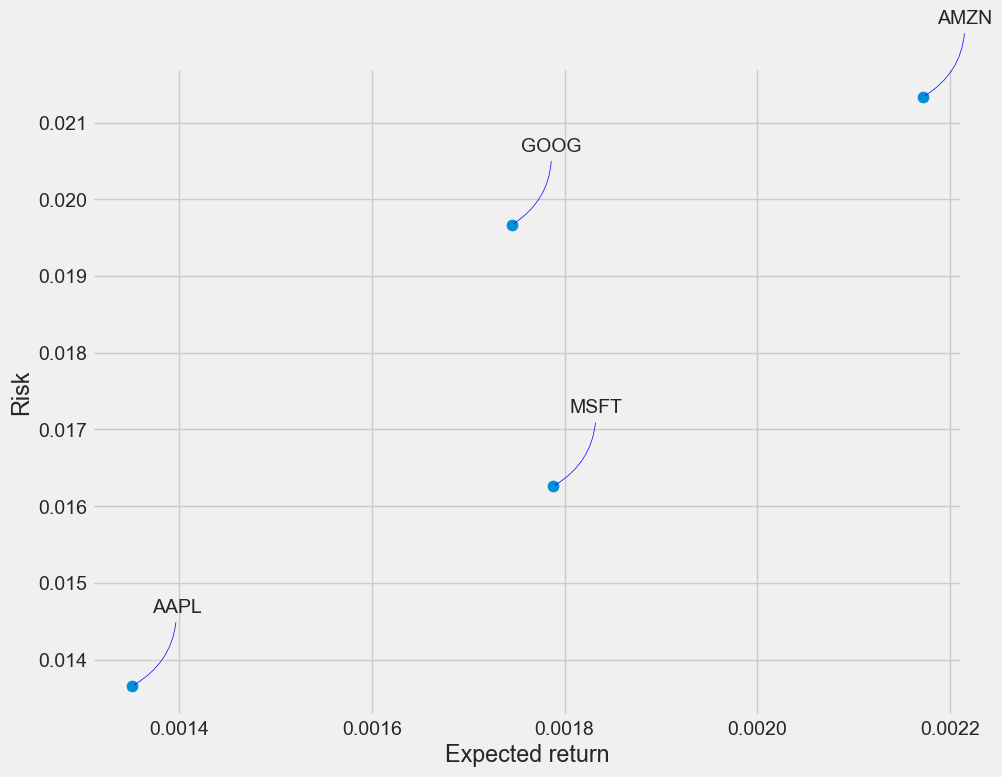

In [21]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## Forecasting the closing stock price of Apple Inc:

In [22]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449691,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516593,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655558,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787856,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767572,394024400
...,...,...,...,...,...,...
2023-12-04,189.979996,190.050003,187.449997,189.429993,189.429993,43389500
2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66628400
2023-12-06,194.449997,194.759995,192.110001,192.320007,192.320007,41089700


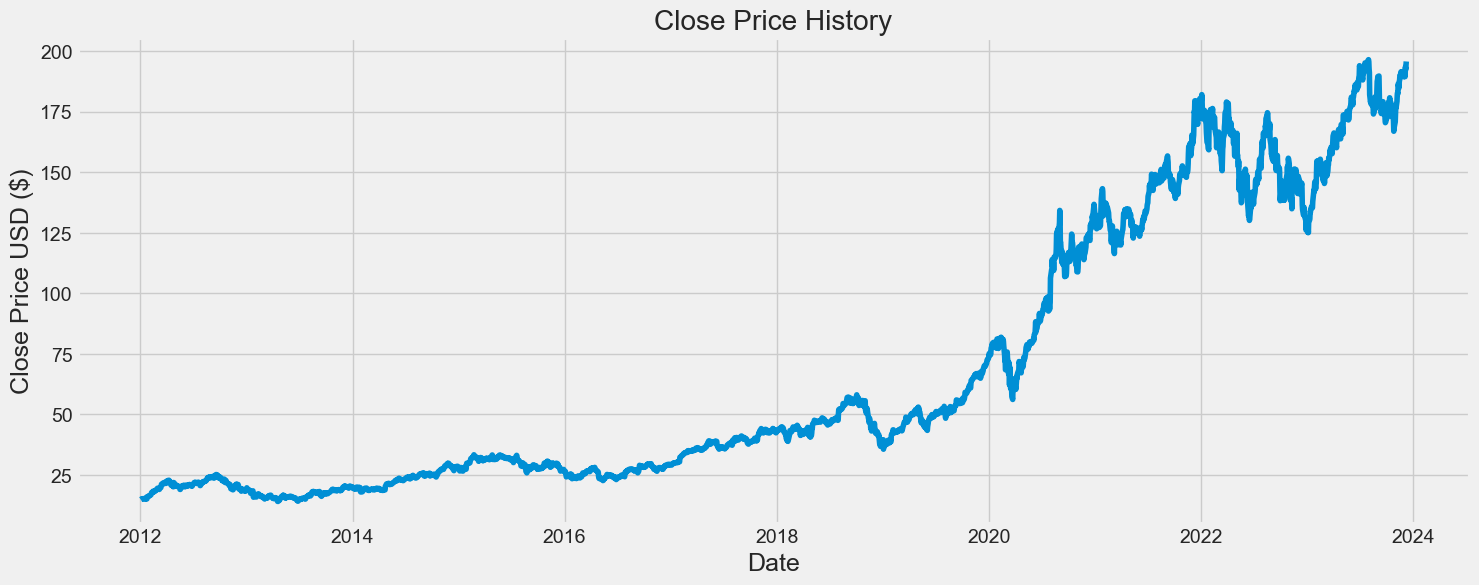

In [24]:
# Plotting

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [25]:
# Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2854

In [26]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.97737023],
       [0.988055  ],
       [0.99594531]])

In [27]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2794/2794 [==============================] - 47s 16ms/step - loss: 0.0012


In [29]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 21ms/step


3.8854079620384043

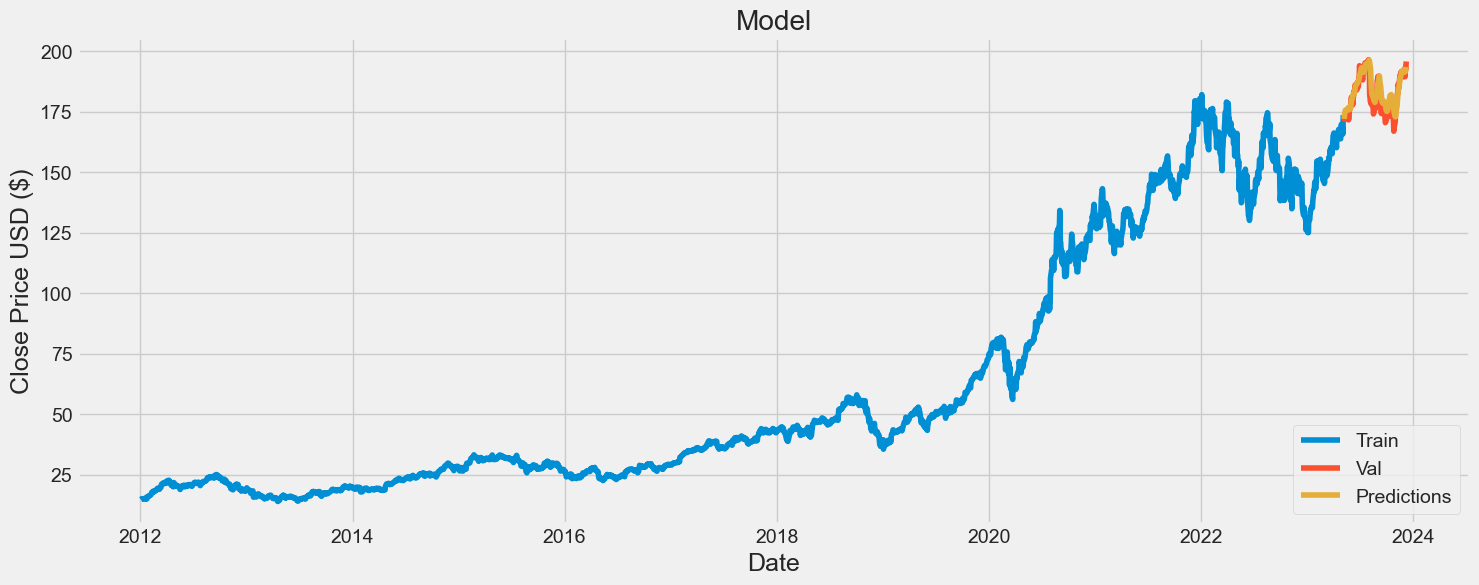

In [32]:
# Plot the data
train = data[:training_data_len].copy()
valid = data[training_data_len:].copy()
valid.loc[:, 'Predictions'] = predictions  # Use .loc to set values in the DataFrame

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



In [33]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-05-08,173.500000,171.968033
2023-05-09,171.770004,173.161652
2023-05-10,173.559998,173.977310
2023-05-11,173.750000,174.812271
2023-05-12,172.570007,175.511459
...,...,...
2023-12-04,189.429993,191.545761
2023-12-05,193.419998,191.481323
2023-12-06,192.320007,192.083099


## To summarize our project, we have effectively executed the following:

1. Loading stock market data from the YAHOO Finance website using yfinance.
2. Exploring and visualizing time-series data using Pandas, Matplotlib, and Seaborn.
3. Assessing the correlation between stocks.
4. Evaluating the risk associated with investing in a specific stock.